# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [7]:
import pandas as pd

cast = pd.read_csv('data/cast.csv')
release = pd.read_csv('data/release_dates.csv')
titles = pd.read_csv('data/titles.csv')

print("Info on cast dataset: ")
print(cast.head(), cast.dtypes, cast.shape)

print("Info on release dataset: ")
print(release.head(), release.dtypes, release.shape)

print("Info on titles dataset: ")
print(titles.head(), titles.dtypes, titles.shape)

Info on cast dataset: 
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object (3442902, 6)
Info on release dataset: 
                    title  year      country        date
0   #73, Shaanthi Nivaasa  2007        India  2007-06-15
1                   #BKKY  2016     Cambodia  2017-10-12
2                 #Beings  2015      Romania  2015-01-29
3               #Captured  2017          USA  2017-09-05
4  #Ewankosau saranghaeyo  2015  Philippines 

### 2. How many movies have the title North by Northwest
1 movie

In [19]:
new_df = titles[titles['title'] == "North by Northwest"]
print(new_df)
    

                     title  year
201761  North by Northwest  1959


### 3. How many version of Hamlet are there, when was the first made? the last?
20 versions, earliest year 1910 latest year 2017

In [27]:
new_df = titles[titles['title'] == "Hamlet"]
print(new_df.shape[0])
earliest = new_df['year'].min()
latest = new_df['year'].max()
print(earliest)
print(latest)

20
1910
2017


### 4. List all the movies called Treasure Island from oldest to newest

In [30]:
new_df = titles[titles['title'] == "Treasure Island"]
print(new_df.sort_values('year'))


                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?
We can see that more movies were made between 1980 - 2000 than between 1950 - 1980 which shows that it has come more popular over time. 

In [31]:
print(titles[titles['year'] == 1950].shape[0])

print(titles[titles['year'] == 1980].shape[0])

print(titles[titles['year'] == 2000].shape[0])




1109
1750
2568


### 6. How big was the cast of Metropolis


In [32]:
new_df = cast[cast['title'] == "Metropolis"]

cast_size = new_df.shape[0]

print(f"The cast size of 'Metropolis' is: {cast_size}")


The cast size of 'Metropolis' is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [35]:
actor_roles_1950s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1950) & (cast['year'] <= 1959)].shape[0]

actor_roles_1990s = cast[(cast['type'] == 'actor') & (cast['year'] >= 1990) & (cast['year'] <= 1999)].shape[0]

print(f"1950s: {actor_roles_1950s}")
print(f"1990s: {actor_roles_1990s}")


1950s: 153559
1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

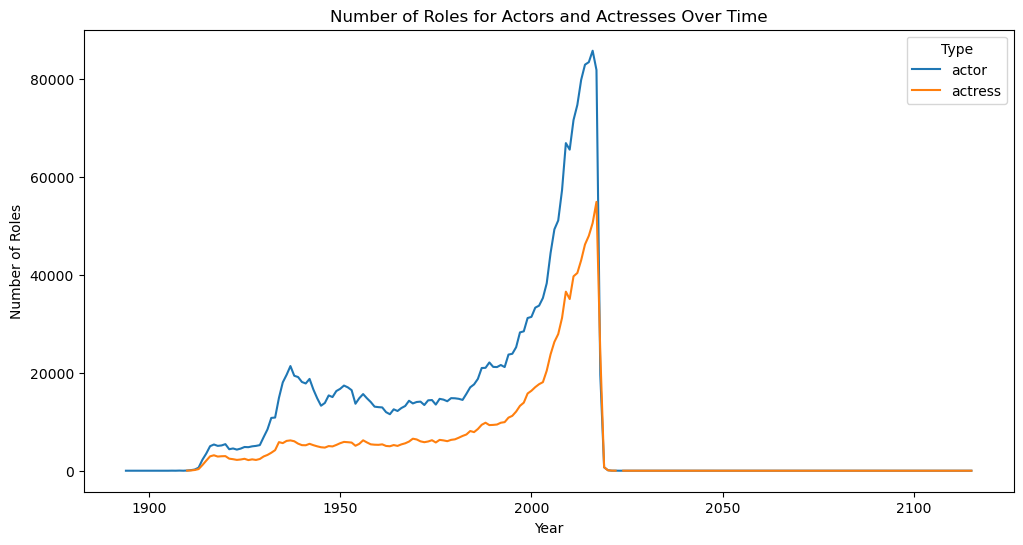

In [38]:
grouped_df = cast.groupby(['year', 'type']).size().unstack()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
grouped_df.plot(kind='line', ax=plt.gca())
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type')
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [41]:
lead_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n'] == 1)]

count = lead_2000s.shape[0]

print(f"Number of leading roles in the 2000s: {lead_2000s}")


Number of leading roles in the 2000s:                                           title  year              name  \
97                       Live Freaky Die Freaky  2006           Nick 13   
137                      Get Rich or Die Tryin'  2005           50 Cent   
257                                       Eeram  2009             Aadhi   
260                                     Mirugam  2007             Aadhi   
574                                 Crazy Jones  2002         Joe Aaron   
...                                         ...   ...               ...   
3442367  Doraemon: Nobita to fushigi kazetsukai  2003      Nobuyo Ôyama   
3442370   Doraemon: Nobita to robotto kingudamu  2002      Nobuyo Ôyama   
3442499              Ich hiess Sabina Spielrein  2002     Eva Österberg   
3442542                                     120  2008       Özge Özberk   
3442747                              Dig og mig  2008  Julie R. Ølgaard   

            type         character    n  
97         actor   

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [50]:
roles_2000s = cast[(cast['year'] >= 2000) & cast['year'] < 2010]
roles_1950s = cast[(cast['year'] >= 1950) & cast['year'] < 1960]

no_rank_2000s = roles_2000s['n'].isna().sum()
no_rank_1950s = roles_1950s['n'].isna().sum()

# Output the results
print("Roles with no rank in the 2000s: ", no_rank_2000s)
print("Roles with no rank in the 1950s: ", no_rank_1950s)

Roles with no rank in the 2000s:  1327783
Roles with no rank in the 1950s:  1327783


### 11. Plot the number of films made in each decade

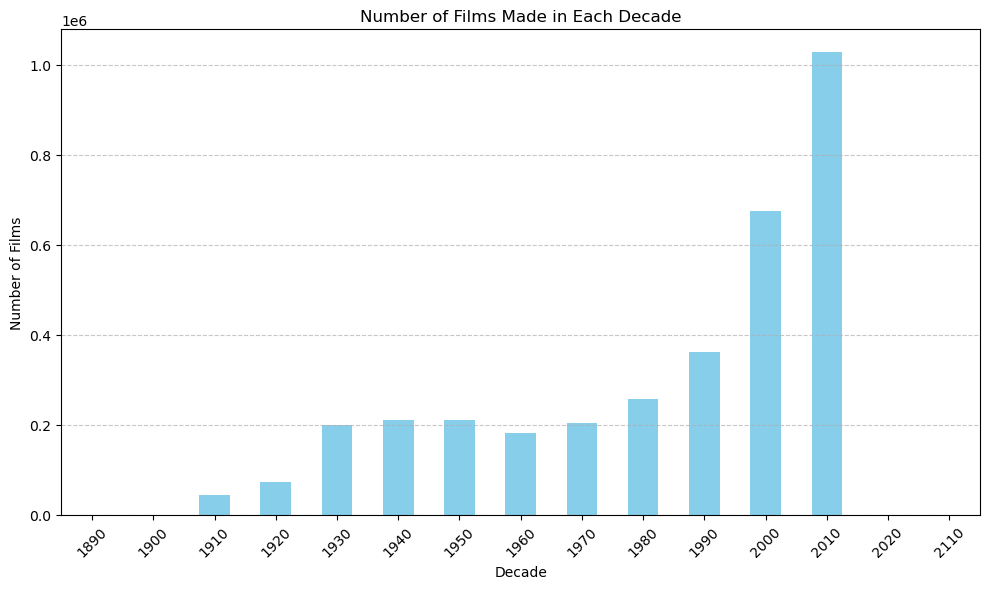

In [53]:
films_per_decade = cast['year'].value_counts().sort_index()

cast['decade'] = (cast['year'] // 10) * 10

films_per_decade = cast['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 12. Plot the number of films with a Rustler character over time

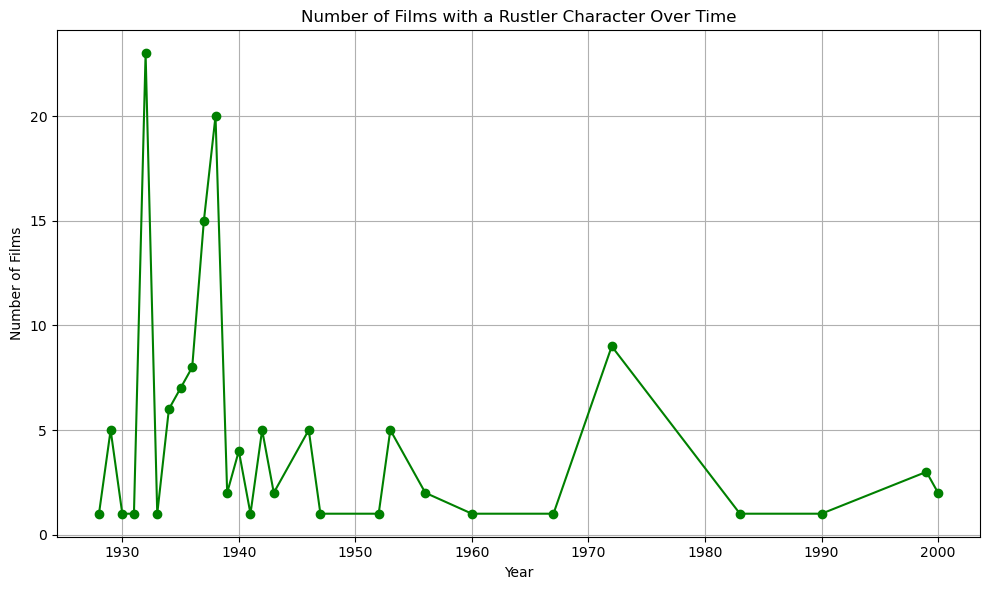

In [54]:
rustler= cast[cast['character'] == 'Rustler']

rustler_count = rustler['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
rustler_count.plot(kind='line', color='green', marker='o', linestyle='-')
plt.title('Number of Films with a Rustler Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.tight_layout()
plt.show()

### 13. What are the top ten character names of all time?

In [56]:
character_count = cast['character'].value_counts()

print("Top ten character names of all time:")
print(character_count.head(10))

Top ten character names of all time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [58]:
cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]

actor_count = cast_1990s['name'].value_counts()

actor = actor_count.idxmax()

number_of_films = actor_count.max()

print(actor, number_of_films)


Shakti Kapoor 143


### 15. What are the top 10 roles that start with Science?

In [63]:
cast_cleaned = cast.dropna(subset=['character'])

science_roles = cast_cleaned[cast_cleaned['character'].str.startswith('Science')]

science_role_count = science_roles['character'].value_counts()

print(science_role_count.head(10))



character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [64]:
film_cast_counts = cast.groupby('title').size()

largest_cast = film_cast_counts.idxmax()
cast_size = film_cast_counts.max()

print(largest_cast, cast_size)

Around the World in 80 Days 1364


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [65]:
cast_size_stats = cast.groupby('title').size().describe()

print(cast_size_stats)

Descriptive statistics for cast size:
count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64


### 18. How many films has Natalie Portman been in in each year throughout her career?

In [66]:
natalie_portman = cast[cast['name'] == 'Natalie Portman']

films_per_year = natalie_portman.groupby('year').size()

print(films_per_year)

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [67]:
natalie_portman = cast[cast['name'] == 'Natalie Portman']

top_co = natalie_portman[natalie_portman['n'].isin([1, 2])]

films_per_year = top_co.groupby('year').size()

print(films_per_year)

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

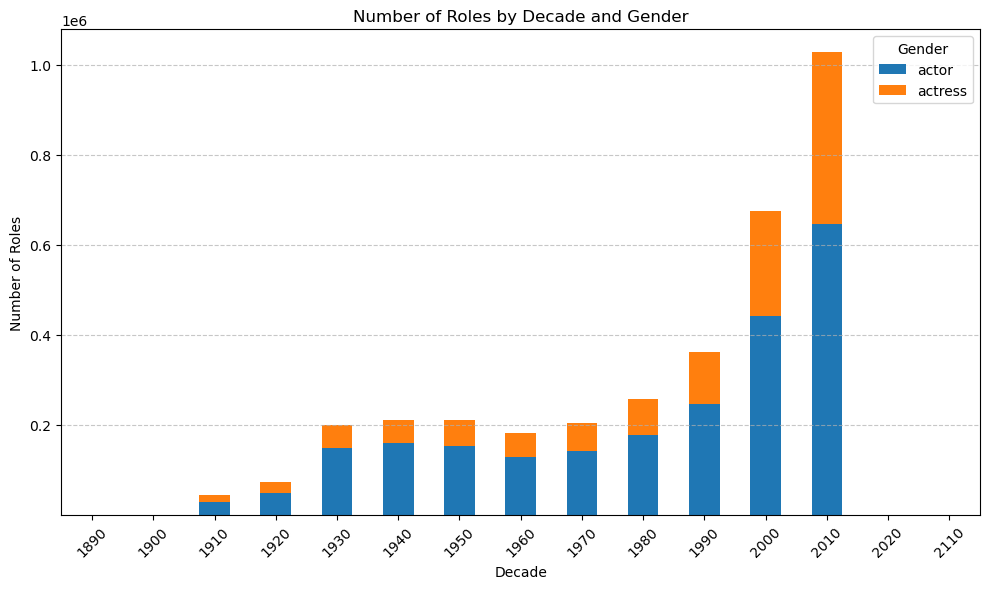

In [69]:
actor_actress_roles = cast[cast['type'].isin(['actor', 'actress'])]

actor_actress_roles['decade'] = (actor_actress_roles['year'] // 10) * 10

gender = actor_actress_roles.groupby(['decade', 'type']).size().unstack(fill_value=0)

gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Roles by Decade and Gender')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

<Figure size 1000x600 with 0 Axes>

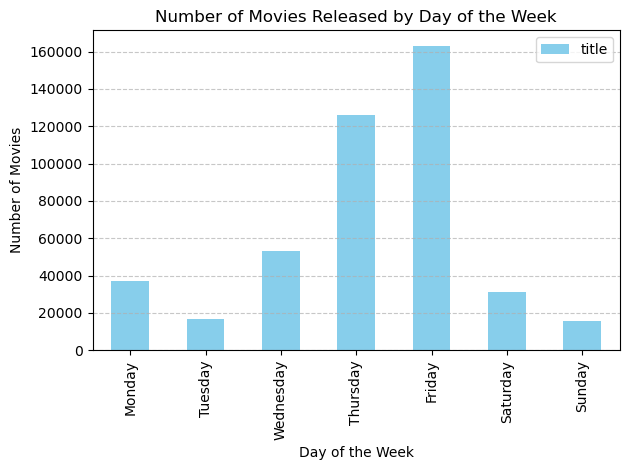

In [78]:
release['date'] = pd.to_datetime(release['date'])

release['day_of_week'] = release['date'].dt.day_name()

release_day_pivot = pd.pivot_table(release, index='day_of_week', values='title', aggfunc='count')

release_day_pivot = release_day_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
release_day_pivot.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

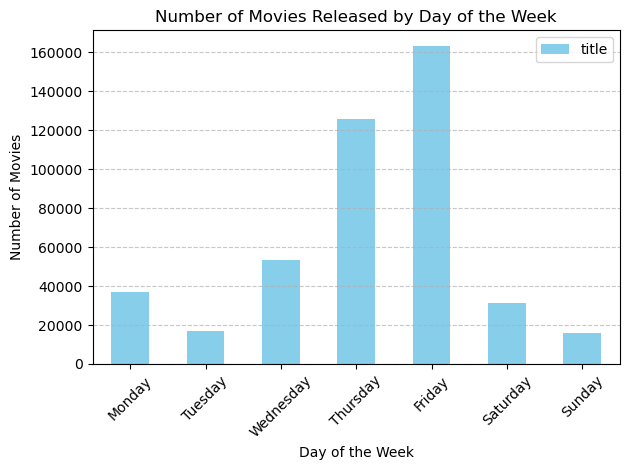

In [79]:
release_day_pivot.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [83]:
star_wars_actors = cast[cast['title'] == 'Star Wars']['name'].unique()

actors_other_films = cast[cast['name'].isin(star_wars_actors)]

non_star_wars = actors_other_films[actors_other_films['title'] != 'Star Wars']['title'].unique()

print(non_star_wars)

['Every Little Crook and Nanny' 'Linda Lovelace for President' 'Rogue One'
 'Smorgasbord' 'The Roommates' 'The Sting II' 'The Student Body'
 'The Zebra Force' "Adventures of a Plumber's Mate"
 'Adventures of a Private Eye' 'Adventures of a Taxi Driver'
 'Alfie Darling' 'Big Zapper' 'Eskimo Nell' 'Hennessy'
 'Licensed to Love and Kill' 'The Deadly Females' 'The Fast Kill'
 'The Night My Number Came Up' 'The Swordsman' 'Track the Man Down'
 '24 Hour Party People' 'Amadeus' 'Flash Gordon' 'Labyrinth' 'Mona Lisa'
 'Sleeping Beauty' 'Star Wars: Episode I - The Phantom Menace'
 'Star Wars: Episode II - Attack of the Clones'
 'Star Wars: Episode III - Revenge of the Sith'
 'Star Wars: Episode V - The Empire Strikes Back'
 'Star Wars: Episode VI - Return of the Jedi' 'The Elephant Man'
 'The King and I' 'Time Bandits' 'U.F.O.' 'Willow' 'Wombling Free'
 'American Graffiti' 'Bizarre Devices'
 "Bon Voyage, Charlie Brown (and Don't Come Back!!)" 'Bullitt'
 'Chu Chu and the Philly Flash' 'Getting E